# **Digit Classification using Convolutional Neural Networks**

**Loading Required packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)


# **Loading dataset**

In [2]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data("/kaggle/input/svhndataset/train_32x32.mat")
X_test, y_test = load_data("/kaggle/input/svhndataset/test_32x32.mat")

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


In [3]:
# Transpose the image arrays
X_train = X_train.transpose((3,0,1,2))
X_test = X_test.transpose((3,0,1,2))

# **Displaying the Shapes of dataset**

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(73257, 32, 32, 3)
(73257, 1)
(26032, 32, 32, 3)
(26032, 1)


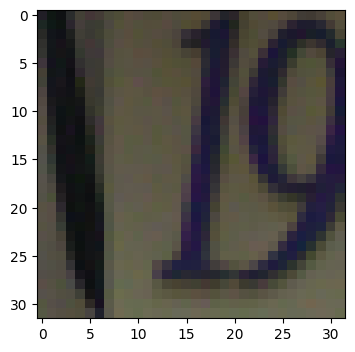

In [5]:
plt.imshow(X_train[0])

# Min Max Scalling

In [6]:
# converting to floating point and normalizing pixel values in range [0,1]
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [7]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# **One Hot encoding**


In [8]:
# Reshaping Labels in One-hot encoding for Multi-class Classification
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)  # 10 classes (digits 0-9)
y_test = to_categorical(y_test, 10)
# Seeing updated Shapes
print("X_train Shape :", X_train.shape)
print("y_train Shape :", y_train.shape)
print("X_test Shape :", X_test.shape)
print("y_test Shape :", y_test.shape)

X_train Shape : (73257, 32, 32, 3)
y_train Shape : (73257, 10)
X_test Shape : (26032, 32, 32, 3)
y_test Shape : (26032, 10)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# **Building the CNN**

In [11]:
from tensorflow.keras import layers, models, optimizers, callbacks

# Creating Updated Model
model = models.Sequential()

# First Convolution Block
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
# Batch Normalization after Conv layer
model.add(layers.BatchNormalization())  
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Downsampling
model.add(layers.Dropout(0.3))  # Dropout to avoid overfitting

# Second Convolution Block
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())  # Batch Normalization
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

# Third Convolution Block
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())  # Batch Normalization
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.4))

# Flatten and Dense Layers
model.add(layers.Flatten())  # Flatten before fully connected layer
model.add(layers.Dense(128, activation='relu'))  # Dense layer with 128 units
model.add(layers.Dropout(0.4))  # Higher dropout for regularization
model.add(layers.Dense(10, activation='softmax'))  # Output layer (for 10 classes)

# Compile the model with Adam optimizer and learning rate scheduler
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])




In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,466 (2.10 MB)

 Trainable params: 551,018 (2.10 MB)

 Non-trainable params: 448 (1.75 KB)

# **Training the CNN**

In [13]:
# Training Model
model.fit(X_train, y_train, validation_split= 0.2, epochs=15, batch_size=64, verbose=1)
# model.evaluate(x_test, y_test, verbose=2)

Epoch 1/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 206s 223ms/step - accuracy: 0.1582 - loss: 2.3647 - val_accuracy: 0.1875 - val_loss: 2.2117
Epoch 2/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 201s 219ms/step - accuracy: 0.1979 - loss: 2.1874 - val_accuracy: 0.3054 - val_loss: 1.9114
Epoch 3/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 203s 220ms/step - accuracy: 0.3726 - loss: 1.7704 - val_accuracy: 0.6941 - val_loss: 0.9511
Epoch 4/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 203s 221ms/step - accuracy: 0.6265 - loss: 1.1321 - val_accuracy: 0.8160 - val_loss: 0.6108
Epoch 5/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 203s 222ms/step - accuracy: 0.7221 - loss: 0.8616 - val_accuracy: 0.7929 - val_loss: 0.6616
Epoch 6/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 203s 221ms/step - accuracy: 0.7744 - loss: 0.7253 - val_accuracy: 0.8574 - val_loss: 0.4712
Epoch 7/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 261s 220ms/step - accuracy: 0.7999 - loss: 0.6516 - val_accuracy: 0.8767 - val_loss: 0.4038
Epoch 8/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 201s 220ms/step - accuracy: 0.8173 -

# **Testing the Model**

In [14]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))



Test accuracy: 0.8921711739397664
